# <h1 style="color:#ff3c38;">*About dataset*</h1>
### This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis.

### Target Variable: Grade Class
#### GradeClass: Classification of students' grades based on GPA:
##### 0: 'A' (GPA >= 3.5)
##### 1: 'B' (3.0 <= GPA < 3.5)
##### 2: 'C' (2.5 <= GPA < 3.0)
##### 3: 'D' (2.0 <= GPA < 2.5)
##### 4: 'F' (GPA < 2.0)

##### We can observe that the GradeClass can be detected directly by knowing the GPA without using machine learning.

# <h1 style="color:#ff3c38;">*Import libraries*</h1>

In [60]:
import numpy as np
import pandas as pd 
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,f1_score


# <h1 style="color:#ff3c38;">*Data preprocessing*</h1>

## Data read

In [2]:
data = pd.read_csv('Student_performance_data _.csv')
data.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


## Check for null values

In [3]:
data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

### No null values found
### That's good!
#### ____________________________
###


## Some data analylitics

### Feature distribution 

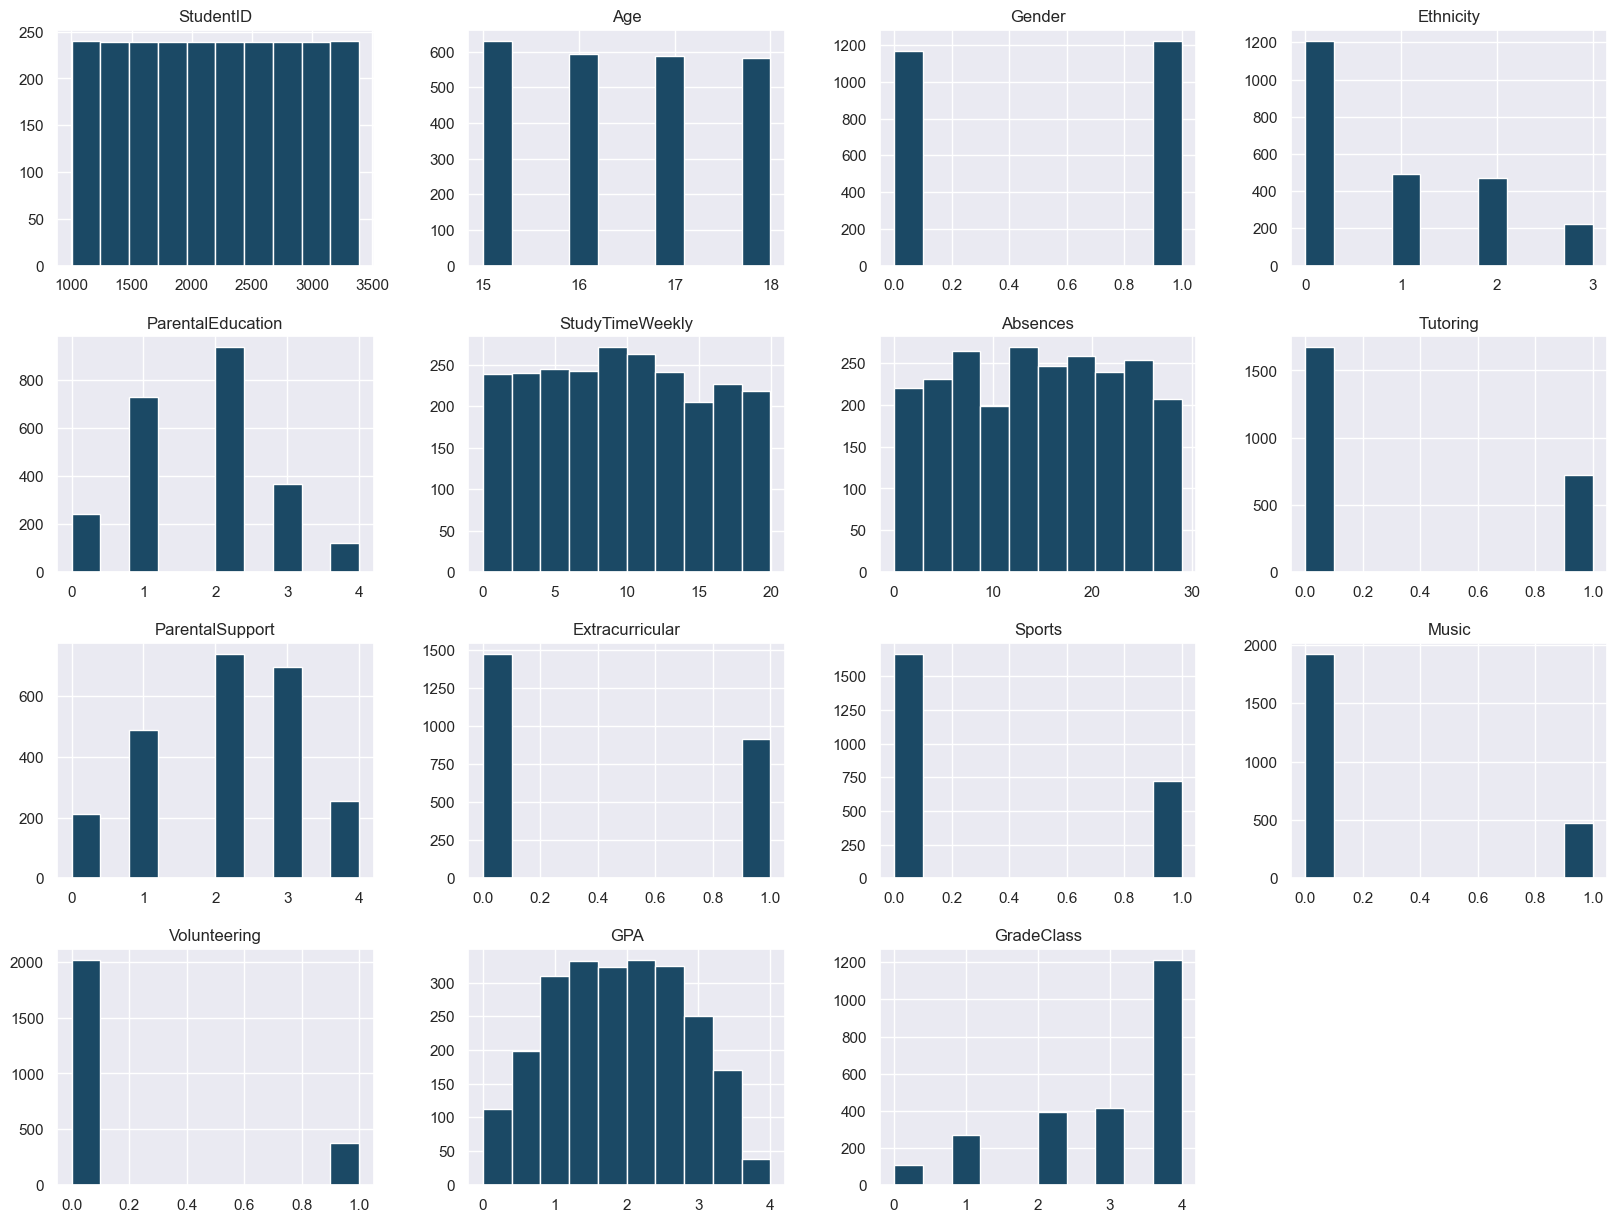

In [4]:
data.hist(figsize=(20,15),color='#1b4965')
plt.show()

### From the previous histograms we can observe that:
####    1. StudentID is unique for each student and has no distributions. So, it has no effect on the GradeClass.
####    2. Age is a categorical feature unlike the usual, that contains 4 categories, ages from15 to 18.
####    3. The category with value 4 in the GradeClass has too many values, this means that a lot of students have low scores.
####    4. GradeClass histogram indicates for class imbalance.

## Feature correlation

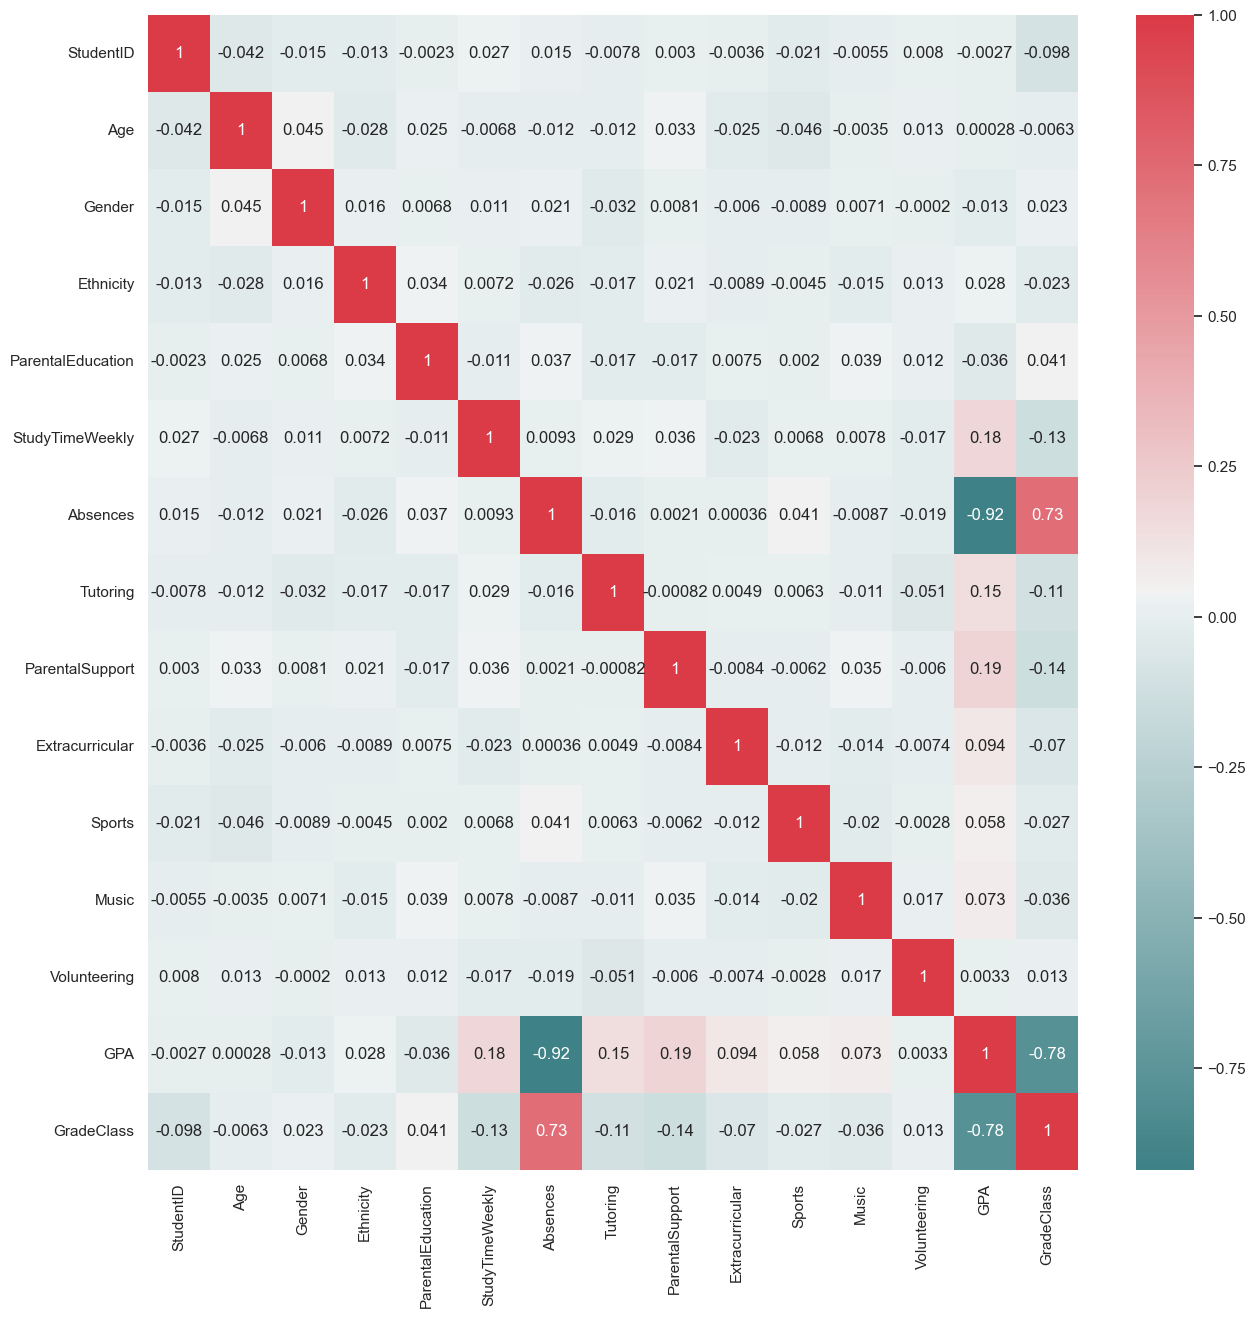

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True,center='light'))
plt.show()

### We can observe that:
#### 1. GradeClass and GPA are highly correlated. GradeClass depends on the value of the GPA with inverse relation.
#### 2. GradeClass and Absences are highly correlated. GradeClass depends on the number of absences with direct relation.
#### Note:  (0 is the highest grade class and 4 is the lowest)
#### ___________________________________________________________
####

## Feature selection

### After reviewing the data set and the previous observations 
#### we will:
##### Ignore StudentID feature 
##### Suppose that the target variable is the GPA
##### Ignore the GradeClass column while building the model, Then calculating it directly after predicting the GPA value
###  Unexpectedly we would work on this model as a regression problem to predict the GPA value 
#### ________________________________________________________________________________________________
#### 

## Splitting Dataset

### Feature vs. Target split

In [6]:
X=data.drop(columns=['StudentID','GradeClass','GPA'])
y=data['GPA']


In [7]:
print('Feature columns:\n')
X.head()

Feature columns:



,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,17,1,0,2,19.833723,7,1,2,0,0,1,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0


In [8]:
print('Target column:\n')
y.head()

Target column:



0    2.929196
1    3.042915
2    0.112602
3    2.054218
4    1.288061
Name: GPA, dtype: float64

### Train vs. Test split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=365,shuffle=True)

## Data encoding

### We will apply One-Hot-Encoding to the following features
##### Age, Ethnicity

In [10]:
ohe=OneHotEncoder(cols=['Age','Ethnicity'])

In [11]:
enc_X_train=ohe.fit_transform(X_train)
enc_X_test=ohe.transform(X_test)

In [12]:
print('Encoded X_train')
enc_X_train.head()

Encoded X_train


,Age_1,Age_2,Age_3,Age_4,Gender,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
1903,1,0,0,0,1,1,0,0,0,1,4.090087,20,1,3,0,0,0,0
2072,0,1,0,0,1,0,1,0,0,2,3.987616,15,1,2,0,1,1,0
1756,1,0,0,0,1,0,0,1,0,1,3.426491,4,0,2,1,0,0,0
59,1,0,0,0,1,0,0,0,1,0,9.468699,23,0,3,0,1,0,0
2138,0,0,1,0,0,1,0,0,0,1,11.105266,27,0,3,0,1,0,0


In [13]:
print('Encoded X_test')
enc_X_test.head()

Encoded X_test


,Age_1,Age_2,Age_3,Age_4,Gender,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
632,1,0,0,0,0,1,0,0,0,1,5.139046,14,0,2,0,0,0,0
1259,0,0,0,1,0,1,0,0,0,1,4.934948,26,1,4,0,0,0,0
2071,0,0,0,1,0,1,0,0,0,1,9.005304,1,1,4,0,1,1,0
1196,0,0,1,0,0,1,0,0,0,2,7.937788,7,1,2,1,0,0,0
2303,1,0,0,0,0,0,0,1,0,2,2.119118,13,1,3,1,0,0,0


## Feature scaling

### We will use the standard scaler

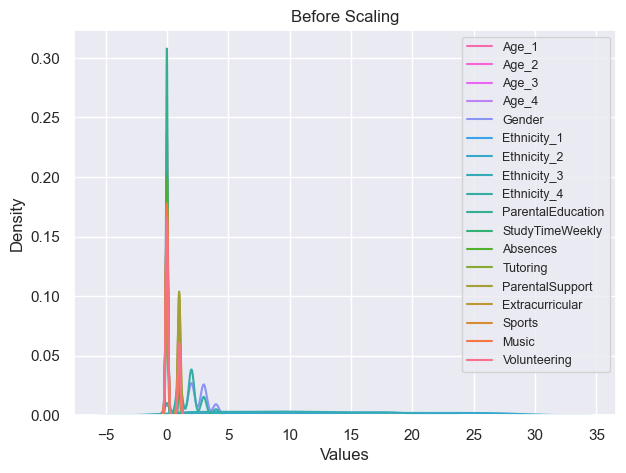

In [14]:
plt.figure(figsize=(7,5))
plt.title('Before Scaling')
plt.xlabel('Values')
sns.kdeplot(enc_X_train,legend=False)
plt.legend(enc_X_train,fontsize=9)
plt.show()

In [15]:
scaled_enc_X_train=enc_X_train.copy()
scaled_enc_X_test=enc_X_test.copy()

scaler=StandardScaler()

for col in enc_X_train.columns:
    scaled_enc_X_train[col]=scaler.fit_transform(enc_X_train[[col]])
    scaled_enc_X_test[col]=scaler.transform(enc_X_test[[col]])

# we used the loop here to keep the type of the data as dataframe and not changing it into array

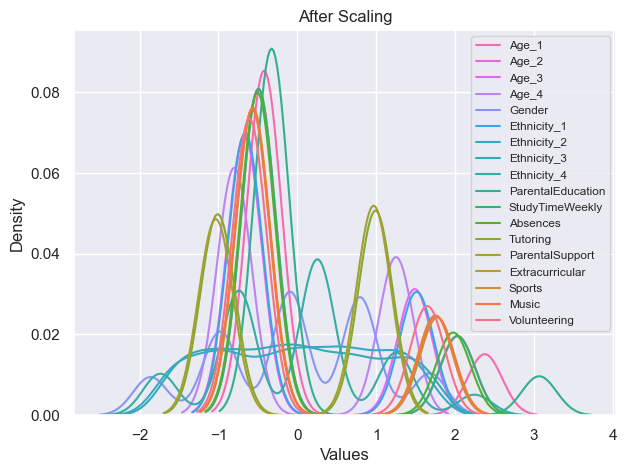

In [16]:
plt.figure(figsize=(7,5))
plt.title('After Scaling')
plt.xlabel('Values')
sns.kdeplot(scaled_enc_X_train)
plt.legend(scaled_enc_X_train,fontsize=8.5)
plt.show()

In [17]:
print('Training data after scaling:')
scaled_enc_X_train.head()

Training data after scaling:


,Age_1,Age_2,Age_3,Age_4,Gender,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
1903,1.647593,-0.567491,-0.571515,-0.563465,0.967592,0.991153,-0.506037,-0.492965,-0.326221,-0.740480,-0.992155,0.637145,1.512264,0.793231,-0.799529,-0.671894,-0.492146,-0.420988
2072,-0.606946,1.762144,-0.571515,-0.563465,0.967592,-1.008926,1.976140,-0.492965,-0.326221,0.254979,-1.010203,0.045179,1.512264,-0.091580,-0.799529,1.488330,2.031917,-0.420988
1756,1.647593,-0.567491,-0.571515,-0.563465,0.967592,-1.008926,-0.506037,2.028540,-0.326221,-0.740480,-1.109032,-1.257147,-0.661260,-0.091580,1.250737,-0.671894,-0.492146,-0.420988
59,1.647593,-0.567491,-0.571515,-0.563465,0.967592,-1.008926,-0.506037,-0.492965,3.065410,-1.735940,-0.044832,0.992325,-0.661260,0.793231,-0.799529,1.488330,-0.492146,-0.420988
2138,-0.606946,-0.567491,1.749735,-0.563465,-1.033493,0.991153,-0.506037,-0.492965,-0.326221,-0.740480,0.243412,1.465898,-0.661260,0.793231,-0.799529,1.488330,-0.492146,-0.420988


In [18]:
scaled_enc_X_train.shape

(1913, 18)

# <h1 style="color:#ff3c38;">*Model building*</h1>

### We have shown above that we will work on the dataset as regression problem with target (GPA)

## Models to build:
### 1. Linear regression
### 2. Random forest Regressor
### ___________________________________
###  

### 1) Linear Regression

##### Fitting the model

In [19]:
lr=LinearRegression()
lr.fit(scaled_enc_X_train,y_train)

LinearRegression()

##### Make predictions

In [20]:
predicts=lr.predict(scaled_enc_X_test)


In [21]:
df_predictions=pd.DataFrame({"Predicted":predicts,"Actual":y_test})
df_predictions.head()

,Predicted,Actual
632,1.565614,1.955873
1259,0.911658,0.889715
2071,3.859655,3.772897
1196,2.805875,2.954534
2303,2.177171,1.996513


In [22]:
train_predicts=lr.predict(scaled_enc_X_train)
df_train_predictions=pd.DataFrame({"Predicted":train_predicts,"Actual":y_train})
df_train_predictions.head()

,Predicted,Actual
1903,1.352744,1.361088
2072,2.031636,1.922166
1756,2.715692,2.883800
59,1.147253,0.929013
2138,0.806007,0.940184


##### Model evaluation

In [23]:
print("\nLinear Regression Model \033[1mTraining\033[0m \033[94mRMSE\033[0m is: ", math.sqrt(mean_squared_error(df_train_predictions.Predicted,df_train_predictions.Actual)))
print("Linear Regression Model \033[1mTesting\033[0m \033[94mRMSE\033[0m is: ", math.sqrt(mean_squared_error(df_predictions.Predicted,df_predictions.Actual)))
print("\033[1mNote: Lower RMSE values indicate better model performance.\033[0m")


print("\nLinear Regression Model \033[1mTraining\033[0m \033[94mMSE\033[0m is: ", (mean_squared_error(df_train_predictions.Predicted,df_train_predictions.Actual)))
print("Linear Regression Model \033[1mTesting\033[0m \033[94mMSE\033[0m is: ", (mean_squared_error(df_predictions.Predicted,df_predictions.Actual)))
print("\033[1mNote: Lower MSE values indicate better model performance.\033[0m")

#Lower RMSE values indicate better model performance, with a value of 0 indicating perfect predictions.

print("\nLinear Regression Model \033[94mTraining Score\033[0m: ",lr.score(scaled_enc_X_train, y_train))
print("Linear Regression Model \033[94mTesting Score\033[0m: ",lr.score(scaled_enc_X_test, y_test))
print("\033[1mNote: Higher scores indicate better model performance.\033[0m")
#higher values indicate better model performance.
#It ranges from 0 to 1, where 0 indicates that the model explains none of the variance in the target variable and 1 indicates that the model explains all of the variance.
#It doesn't provide information about the absolute magnitude of errors like RMSE does.

#RMSE quantifies the average magnitude of errors, 
#while R-squared quantifies the goodness of fit of the model. 
#Both metrics are important for evaluating regression models, 
#with RMSE providing information about prediction accuracy and R-squared providing information about the overall model fit. 
#It's common to use both metrics together to get a comprehensive understanding of model performance.



Linear Regression Model Training RMSE is:  0.1964794097500553
Linear Regression Model Testing RMSE is:  0.19432673299124695
Note: Lower RMSE values indicate better model performance.

Linear Regression Model Training MSE is:  0.03860415845573012
Linear Regression Model Testing MSE is:  0.03776287915505139
Note: Lower MSE values indicate better model performance.

Linear Regression Model Training Score:  0.9535669647080112
Linear Regression Model Testing Score:  0.9560654011947947
Note: Higher scores indicate better model performance.


##### Get GradeClass

In [26]:
def GradeClass(GPA):
    ret=[]
    for gpa in GPA:
        if gpa >= 3.5:
            ret.append(0) 
        elif 3.0 <= gpa < 3.5:
            ret.append(1) 
        elif 2.5 <= gpa < 3.0:
            ret.append(2) 
        elif 2.0 <= gpa < 2.5:
            ret.append(3)
        else :
            ret.append(4)
    return ret

##### GradeClass accuracy

In [27]:
gradeclass_test=pd.DataFrame({"Predicted":GradeClass(df_predictions['Predicted']),"Actual":GradeClass(df_predictions['Actual'])})
gradeclass_test.head()

,Predicted,Actual
0,4,4
1,4,4
2,0,0
3,2,2
4,3,4


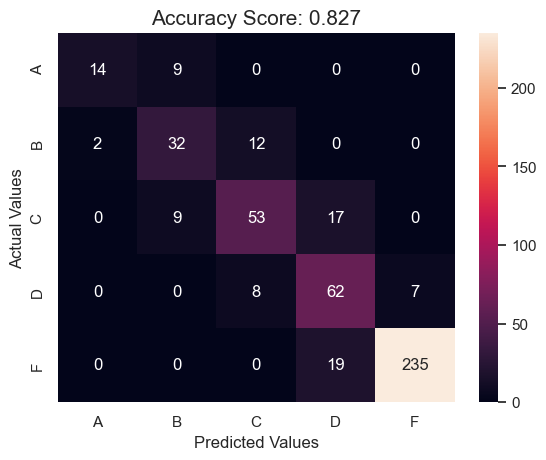

Note:
0 -> A
1 -> B
2 -> C
3 -> D
4 -> F



In [56]:
# Calculate and plot the confusion matrix
score=round(accuracy_score(gradeclass_test['Actual'], gradeclass_test['Predicted']),3)
cm = confusion_matrix(gradeclass_test['Actual'], gradeclass_test['Predicted'])
sns.heatmap(cm, annot=True, fmt=".0f",xticklabels=['A','B','C','D','F'],yticklabels=['A','B','C','D','F'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()
print("\033[1mNote:\n\033[94m0 -> A\n1 -> B\n2 -> C\n3 -> D\n4 -> F\n\033[0m")

In [50]:
print(classification_report(gradeclass_test['Actual'], gradeclass_test['Predicted']))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72        23
           1       0.64      0.70      0.67        46
           2       0.73      0.67      0.70        79
           3       0.63      0.81      0.71        77
           4       0.97      0.93      0.95       254

    accuracy                           0.83       479
   macro avg       0.77      0.74      0.75       479
weighted avg       0.84      0.83      0.83       479



### 2) Random Forest Regressor

##### Fitting the model

In [62]:
rf=RandomForestRegressor()
rf.fit(scaled_enc_X_train,y_train)

RandomForestRegressor()

##### Make predictions

In [63]:
rf_predicts=rf.predict(scaled_enc_X_test)

In [64]:
rf_predictions=pd.DataFrame({"Predicted":rf_predicts,"Actual":y_test})
rf_predictions.head()

,Predicted,Actual
632,1.714391,1.955873
1259,0.775657,0.889715
2071,3.629891,3.772897
1196,2.763249,2.954534
2303,2.092483,1.996513


In [65]:
rf_train_predicts=rf.predict(scaled_enc_X_train)
rf_train_predictions=pd.DataFrame({"Predicted":rf_train_predicts,"Actual":y_train})
rf_train_predictions.head()

,Predicted,Actual
1903,1.367519,1.361088
2072,1.893740,1.922166
1756,2.867054,2.883800
59,1.001044,0.929013
2138,0.889039,0.940184


##### Model evaluation

In [79]:
print("\nRandom Forest Model \033[1mTraining\033[0m \033[94mRMSE\033[0m is: ", math.sqrt(mean_squared_error(rf_train_predictions.Predicted,rf_train_predictions.Actual)))
print("Random Forest Model \033[1mTesting\033[0m \033[94mRMSE\033[0m is: ", math.sqrt(mean_squared_error(rf_predictions.Predicted,rf_predictions.Actual)))
print("\033[1mNote: Lower RMSE values indicate better model performance.\033[0m")


print("\nRandom Forest Model \033[1mTraining\033[0m \033[94mMSE\033[0m is: ", (mean_squared_error(rf_train_predictions.Predicted,rf_train_predictions.Actual)))
print("Random Forest Model \033[1mTesting\033[0m \033[94mMSE\033[0m is: ", (mean_squared_error(rf_predictions.Predicted,rf_predictions.Actual)))
print("\033[1mNote: Lower MSE values indicate better model performance.\033[0m")

#Lower RMSE values indicate better model performance, with a value of 0 indicating perfect predictions.

print("\nRandom Forest Model \033[94mTraining Score\033[0m: ",rf.score(scaled_enc_X_train, y_train))
print("Random Forest Model \033[94mTesting Score\033[0m: ",rf.score(scaled_enc_X_test, y_test))
print("\033[1mNote: Higher scores indicate better model performance.\033[0m")
#higher values indicate better model performance.
#It ranges from 0 to 1, where 0 indicates that the model explains none of the variance in the target variable and 1 indicates that the model explains all of the variance.
#It doesn't provide information about the absolute magnitude of errors like RMSE does.

#RMSE quantifies the average magnitude of errors, 
#while R-squared quantifies the goodness of fit of the model. 
#Both metrics are important for evaluating regression models, 
#with RMSE providing information about prediction accuracy and R-squared providing information about the overall model fit. 
#It's common to use both metrics together to get a comprehensive understanding of model performance.




Random Forest Model Training RMSE is:  0.09152644700319953
Random Forest Model Testing RMSE is:  0.23778035911238984
Note: Lower RMSE values indicate better model performance.

Random Forest Model Training MSE is:  0.008377090501029494
Random Forest Model Testing MSE is:  0.05653949917961707
Note: Lower MSE values indicate better model performance.

Random Forest Model Training Score:  0.9899240456355357
Random Forest Model Testing Score:  0.9342200523719487
Note: Higher scores indicate better model performance.


##### GradeClass Accuracy

In [67]:
RF_gradeclass_test=pd.DataFrame({"Predicted":GradeClass(rf_predictions['Predicted']),"Actual":GradeClass(rf_predictions['Actual'])})
RF_gradeclass_test.head()

,Predicted,Actual
0,4,4
1,4,4
2,0,0
3,2,2
4,3,4


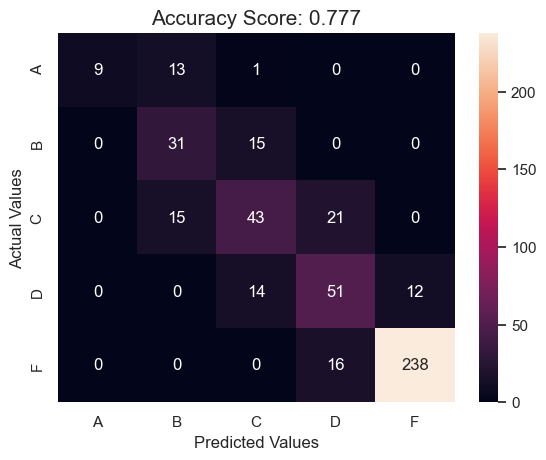

Note:
0 -> A
1 -> B
2 -> C
3 -> D
4 -> F



In [68]:
# Calculate and plot the confusion matrix
score_rf=round(accuracy_score(RF_gradeclass_test['Actual'], RF_gradeclass_test['Predicted']),3)
cm_rf = confusion_matrix(RF_gradeclass_test['Actual'], RF_gradeclass_test['Predicted'])
sns.heatmap(cm_rf, annot=True, fmt=".0f",xticklabels=['A','B','C','D','F'],yticklabels=['A','B','C','D','F'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score_rf), size=15)
plt.show()
print("\033[1mNote:\n\033[94m0 -> A\n1 -> B\n2 -> C\n3 -> D\n4 -> F\n\033[0m")

In [69]:
print(classification_report(RF_gradeclass_test['Actual'], RF_gradeclass_test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.39      0.56        23
           1       0.53      0.67      0.59        46
           2       0.59      0.54      0.57        79
           3       0.58      0.66      0.62        77
           4       0.95      0.94      0.94       254

    accuracy                           0.78       479
   macro avg       0.73      0.64      0.66       479
weighted avg       0.79      0.78      0.78       479



# *******************************************************************************************

# <h1 style="color:red;">*Analysing the results*</h1>

## *Model Performance:*

### _1) Linear Regression:_ Demonstrates consistent performance with similar training and testing RMSE, MSE, and R² scores. This consistency suggests that the model generalizes well and is not overfitting to the training data.
### _2) Random Forest:_ Shows excellent performance on the training data but a significant drop in performance on the test data, indicated by higher RMSE and MSE and lower R² scores. This discrepancy suggests that the model may be overfitting to the training data.


## *Accuracy and F1-Scores:*

### _1) Linear Regression:_ Achieves higher overall accuracy and F1-scores (both macro and weighted averages) compared to the Random Forest model. This indicates better performance across all classes and a more balanced model.
### _2) Random Forest:_ While it performs exceptionally well on the training data, its performance on the test data is not as strong as the linear regression model, indicating potential overfitting and less generalization capability.

# *Conclusion*
### Given the above analysis, the _*Linear Regression model*_ is the preferred choice for this project. It offers better generalization, higher accuracy, and more balanced performance across different classes. While the Random Forest model shows strong performance on the training data, its overfitting and subsequent lower performance on the test data make it less suitable for deployment in this scenario.